In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
from statistics import stdev, mean, median
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import numpy as np
import random
import scipy
import math
import copy
import csv

Количество интервалов: 3

Данные по интервалу №1
Количество пришедших заявок N (за время t): 1
Средний интервал времени между поступлением заявок (tвх): 2
Среднее время на обработку одной заявки одним прибором (tвых): 3

Данные по интервалу №2
Количество пришедших заявок N (за время t): 4
Средний интервал времени между поступлением заявок (tвх): 5
Среднее время на обработку одной заявки одним прибором (tвых): 6

Данные по интервалу №3
Количество пришедших заявок N (за время t): 7
Средний интервал времени между поступлением заявок (tвх): 8
Среднее время на обработку одной заявки одним прибором (tвых): 9

Количество обслуживающих приборов: 4
Максимальная длина очереди: 10


                                   Интервал 1  Интервал 2  Интервал 3
Интенсивность входного потока         0.5000      0.8000      0.8750
Интенсивность выходного потока        0.3333      0.1667      0.1111
Показатель нагруженности системы      1.5002      4.7990      7.8758

p0 - Бездействие
p1-p4 - Нагруженность си

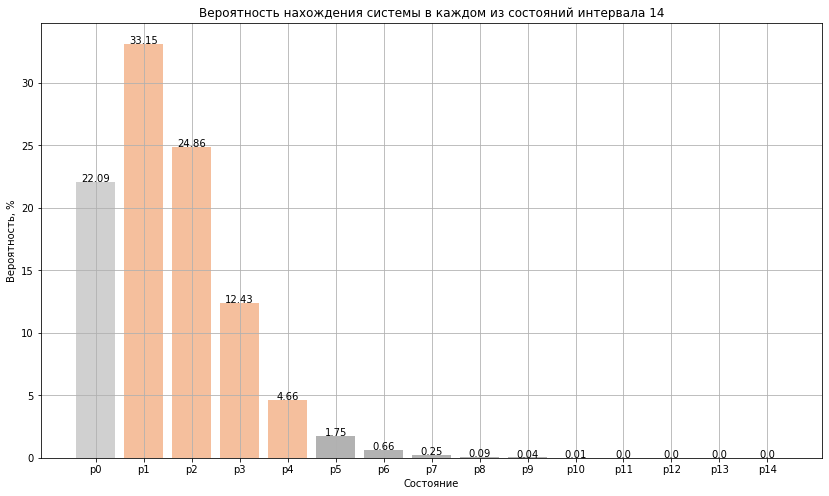


 Вероятности нахождения системы в каждом из состояний временного интервала 2
                   p0    p1    p2    p3    p4    p5    p6    p7    p8    p9  \
Вероятность, %  0.13  0.64  1.55  2.47  2.97  3.56  4.27  5.12  6.14  7.37   

                 p10    p11    p12    p13    p14  
Вероятность, %  8.84  10.61  12.73  15.27  18.32  


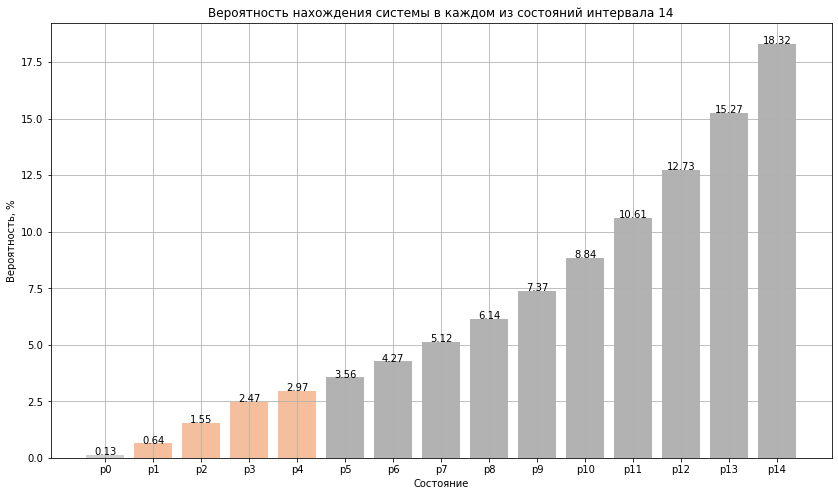


 Вероятности нахождения системы в каждом из состояний временного интервала 3
                  p0   p1    p2    p3    p4    p5    p6    p7    p8    p9  \
Вероятность, %  0.0  0.0  0.01  0.03  0.06  0.11  0.22  0.43  0.84  1.66   

                 p10   p11   p12   p13    p14  
Вероятность, %  3.27  6.45  12.7  25.0  49.22  


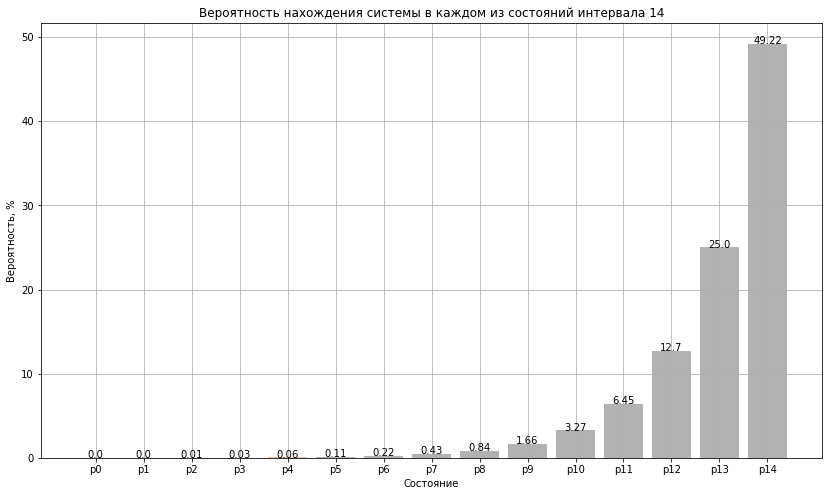

Характеристика для клиентов
                                       Интервал 1  Интервал 2  Интервал 3
Вероятность отказа в обслуживании, %       0.000      18.320       49.22
Вероятность встать в очередь, %            2.800      73.910       50.68
Средняя длина очереди                      0.045       6.188        0.00
Среднее время ожидания в очереди           0.090       9.470        0.00


Характеристика для владельца
                                  Интервал 1  Интервал 2  Интервал 3
Абсолютн. пропускная способн.         0.500       0.653       0.444
Относит. пропускная способн., %       1.000       0.817       0.508
Среднее число занятых приборов        1.500       3.917       3.996
Коэффициент простоя                   0.625       0.021       0.001


In [7]:
def input_data(i):
    """Метод предназначен для защиты от неверного ввода данных."""
    try:
        value = int(input(i))
        return value
    except:
        print('Вводимые данные должны быть целым числом!')
        return input_data(i)


def task_1(data):
    """Функция для расчета всех показателей задания 2 из ТЗ."""
    
    def intensivn_input(data):
        """
        Функция рассчитывает интенсивность входного и выходного потока заявок
        и показатель нагруженности системы.
        """
        list_intensivn_input = []
        list_intensivn_output = []
        system_load = []
        for interval in data:
            list_intensivn_input.append(round(data[interval]['N'] / data[interval]['t_in'], 4))
            list_intensivn_output.append(round(1 / data[interval]['t_out'], 4))
            system_load.append(round(list_intensivn_input[-1] / list_intensivn_output[-1], 4))
        return list_intensivn_input, list_intensivn_output, system_load
    
    def queue(system_load):
        """
        Функция рассчитывает количество обслуживающих приборов 
        и максимальную длину очереди.
        """
        sum_service_device = input_data('\nКоличество обслуживающих приборов: ')
        sum_queue = input_data('Максимальная длина очереди: ')
        return sum_service_device, sum_queue
    
    
    list_intensivn_input, list_intensivn_output, system_load = intensivn_input(data)
    sum_service_device, sum_queue = queue(system_load)
    
    name_cols = [f'Интервал {i}' for i in range(1, len(list_intensivn_input) + 1)]
    name_rows = ['Интенсивность входного потока', 'Интенсивность выходного потока', 'Показатель нагруженности системы']
    print('\n\n', pd.DataFrame([list_intensivn_input, list_intensivn_output, system_load],
                               columns = name_cols,
                               index = name_rows))
    return system_load, sum_service_device, sum_queue, list_intensivn_input, list_intensivn_output
    

def task_2(data, system_load, sum_service_device, sum_queue):
    """Функция для расчета всех показателей задания 3 из ТЗ."""
    
    def p(load, device, queue, n):
        """
        Функция предназначена для расчета вероятностей 
        нахождения системы в каждом из состояний.
        """
        list_load_1 = []
        for i in range(device + 1):
            value = load**i / math.factorial(i)
            list_load_1.append(round(value, 4))
            
        list_load_2 = []
        for i in range(device + 1, queue + device + 1):
            value = load**i / (device**(i - device) * math.factorial(device))
            list_load_2.append(round(value, 4))
        list_load = list_load_1 + list_load_2
        
        p_0 = sum(list_load)**(-1)
        list_p = []
        list_p.append(round(p_0 * 100, 2))
        for i in list_load[1:]:
            list_p.append(round(i * p_0 * 100, 2))
        
        df = pd.DataFrame([list_p],
                         columns = [f'p{i}' for i in range(len(list_p))],
                         index = ['Вероятность, %'])
        print('\n', f'Вероятности нахождения системы в каждом из состояний временного интервала {n}\n', df)
        return list_p
    
    def color(device, sum_queue):
        """Функция для установки цветов столбцов в гистограммах."""
        color = []
        color.append('#d0d0d0')
        for i in range(device):
            color.append('#f5bf9d')
        for i in range(sum_queue):
            color.append('#b2b2b2')
        return color
    
    def graph(list_p, device, sum_queue, i):
        """Функция для построения гистограмм по вероятностям."""
        plt.figure(figsize=(14, 8))
        plt.bar([f'p{i}' for i in range(len(list_p))],
                list_p,
                color=color(device, sum_queue))
        
        for i, v in enumerate(list_p):
            plt.text(i, v, str(v), ha="center", color='black')
        
        plt.title(f'Вероятность нахождения системы в каждом из состояний интервала {i}')
        plt.xlabel('Состояние')
        plt.ylabel('Вероятность, %')
        plt.grid()
        plt.show()
    
    print('\np0 - Бездействие')
    print(f'p1-p{sum_service_device} - Нагруженность системы без очереди')
    print(f'p{sum_service_device + 1}-p{sum_service_device + sum_queue} - Нагруженность системы с очередью')
    
    all_list_p = []
    for i in range(len(data)):
        list_p = p(system_load[i], sum_service_device, sum_queue, i + 1)
        all_list_p.append(list_p)
        graph(list_p, sum_service_device, sum_queue, i + 1)
    return all_list_p
    

def task_3(list_p, system_load, device, sum_queue, intensivn):
    """Функция для расчета параметров системы, важных для клиента."""
    
    def average_len_queue(i, list_p, system_load, device, sum_queue):
        """Функция для расчета средней длины очереди."""
        try:
            value_1 = (1 - ((system_load[i] / device)**sum_queue) * (sum_queue + 1 - sum_queue * system_load[i] / device))
            value_2 = device * math.factorial(device) * ((1 - system_load[i] / device)**2)
            return round(((system_load[i]**(device + 1)) * value_1 * list_p[i][0]/100) / value_2, 3)
        except:
            return 0
    
    def average_time_waiting(i, length, list_p, intensivn):
        """Функция для расчета вреднего времени ожидания в очереди."""
        return round(length / (intensivn[i] * (1 - list_p[i][-1] / 100)), 3)
    
    
    p_refusal, p_queue, average_queue, average_time_wait = [], [], [], []
    for i in range(len(intensivn)):
        p_refusal.append(list_p[i][-1])
        p_queue.append(round(sum(list_p[i][device + 1 : len(list_p[i]) - 1]), 3))
        length = average_len_queue(i, list_p, system_load, device, sum_queue)
        average_queue.append(length)
        average_time_wait.append(average_time_waiting(i, length, list_p, intensivn))
    
    name_cols = [f'Интервал {i}' for i in range(1, len(intensivn) + 1)]
    name_rows = ['Вероятность отказа в обслуживании, %', 
                 'Вероятность встать в очередь, %', 
                 'Средняя длина очереди', 
                 'Среднее время ожидания в очереди']
    print('Характеристика для клиентов\n', pd.DataFrame([p_refusal, p_queue, average_queue, average_time_wait],
                               columns = name_cols,
                               index = name_rows))
    
    return p_refusal


def task_4(p_refusal, intensivn_inp, intensivn_out, device):
    """Функция для расчета параметров системы, важных для владельца."""
    
    absol_throughput, relat_throughput, busy_device, K = [], [], [], []
    for i in range(len(intensivn_inp)):
        absol_throughput.append(round(intensivn_inp[i] * (1 - p_refusal[i] / 100), 3))
        relat_throughput.append(round(1 - p_refusal[i] / 100, 3))
        busy_device.append(round(absol_throughput[i] / intensivn_out[i], 3))
        K.append(round(1 - busy_device[i] / device, 3))
    
    name_cols = [f'Интервал {i}' for i in range(1, len(intensivn_inp) + 1)]
    name_rows = ['Абсолютн. пропускная способн.', 
                 'Относит. пропускная способн., %', 
                 'Среднее число занятых приборов', 
                 'Коэффициент простоя']
    print('\n\nХарактеристика для владельца\n', pd.DataFrame([absol_throughput, relat_throughput, busy_device, K],
                               columns = name_cols,
                               index = name_rows))


data = {}
interval = {}

for i in range(1, input_data('Количество интервалов: ') + 1):
    print(f'\nДанные по интервалу №{i}')
    interval['N'] = input_data('Количество пришедших заявок N (за время t): ')
    interval['t_in'] = input_data('Средний интервал времени между поступлением заявок (tвх): ')
    interval['t_out'] = input_data('Среднее время на обработку одной заявки одним прибором (tвых): ')
    data[f'Интервал {i}'] = interval
    interval = {}


system_load, sum_service_device, sum_queue, list_intensivn_input, list_intensivn_output = task_1(data)
all_list_p = task_2(data, system_load, sum_service_device, sum_queue)
p_refusal = task_3(all_list_p, system_load, sum_service_device, sum_queue, list_intensivn_input)
task_4(p_refusal, list_intensivn_input, list_intensivn_output, sum_service_device)